# Figures 4.3 and 4.4: Convergence of Padé in H=1/2 case

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\CC}{\mathbb{C} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
$$

In [1]:
source("roughHestonAdamsLambda.R")
source("roughHestonPadeLambda.R")

In [2]:
library(colorspace)
library(repr)
options(repr.plot.width=10,repr.plot.height=7)
my.col <- sequential_hcl(7, palette="Batlow")

We choose parameters similar to those in Roughening Heston.

Set $H=1/2$:

In [3]:
params.rHeston <- list(H=1/2-1e-8,al=1-1e-8,nu=.4,rho=-.65,lam=1)

### Giacomo Bormetti Adams scheme

In [4]:
a <- 3-1i/2
n <- 1000
xx <- 8
x.adams.1k <- xx*(0:n)/n

In [5]:
dh.adams.1k <- dhA(params.rHeston)(n=n,a=a,bigT=xx)

### Classical Heston closed-form solution

In [6]:
hHeston <- function (params) 
{
    lambda <- params$lam
    rho <- params$rho
    nu <- params$nu
    
    function(u, tau) {
        al <- -u * u/2 - (0+1i) * u/2
        bet <- lambda - rho * nu * (0+1i) * u
        gam <- nu^2/2
        d <- sqrt(bet * bet - 4 * al * gam)
        rp <- (bet + d)/(2 * gam)
        rm <- (bet - d)/(2 * gam)
        g <- rm/rp
        D <- rm * (1 - exp(-d * tau))/(1 - g * exp(-d * tau))
       
        return(D)
    }
}

In [7]:
dhHeston <- function (params) 
function(a, x) {
    rho <- params$rho
    nu <- params$nu
    lam <- params$lam
    lamp <- lam/nu
    lamTilde <- lamp - (0 + (0+1i)) * rho * a
    aa <- sqrt(a * (a + (0 + (0+1i))) + lamTilde^2)
    rm <- lamTilde - aa
    rp <- lamTilde + aa
    h.pade <- hHeston(params)(a, x)
    res <- 1/2 * (nu*h.pade - rm) * (nu*h.pade - rp)
    return(res)
}

### Padé approximation

In [8]:
h.Pade33(params.rHeston)(a,3)

[1] -2.731378+1.277413i

In [9]:
d.h.Pade33(params.rHeston)(a,3)

[1] -0.0758689+0.1287422i

### Graphical comparison of approximations

$ m n$ means order $m$ polynomial in the numerator and order $n$ polynomial in the denominator.

- `d.h.pade22` and `d.h.pade33` are $D^\alpha H(t;a)$ using Padé approximations of $h(t;a)$ 

### Plot $\Re$ and $\Im$ together


In [10]:
options(repr.plot.width=14,repr.plot.height=7, repr.plot.res=200)

In [11]:
legend.text <- c(
    "Exact",
    expression(h[A]),
    expression(h^{(list(2,2))}),
    expression(h^{(list(3,3))}),
    expression(h^{(list(4,4))}),
    expression(h^{(list(5,5))}))

In [12]:
legend.ty <- c(2,1,2,2,2,2)
legend.col <- c("royalblue","hotpink2",my.col[2:5])
legend.lw <- c(3,3,1,1,1,1)

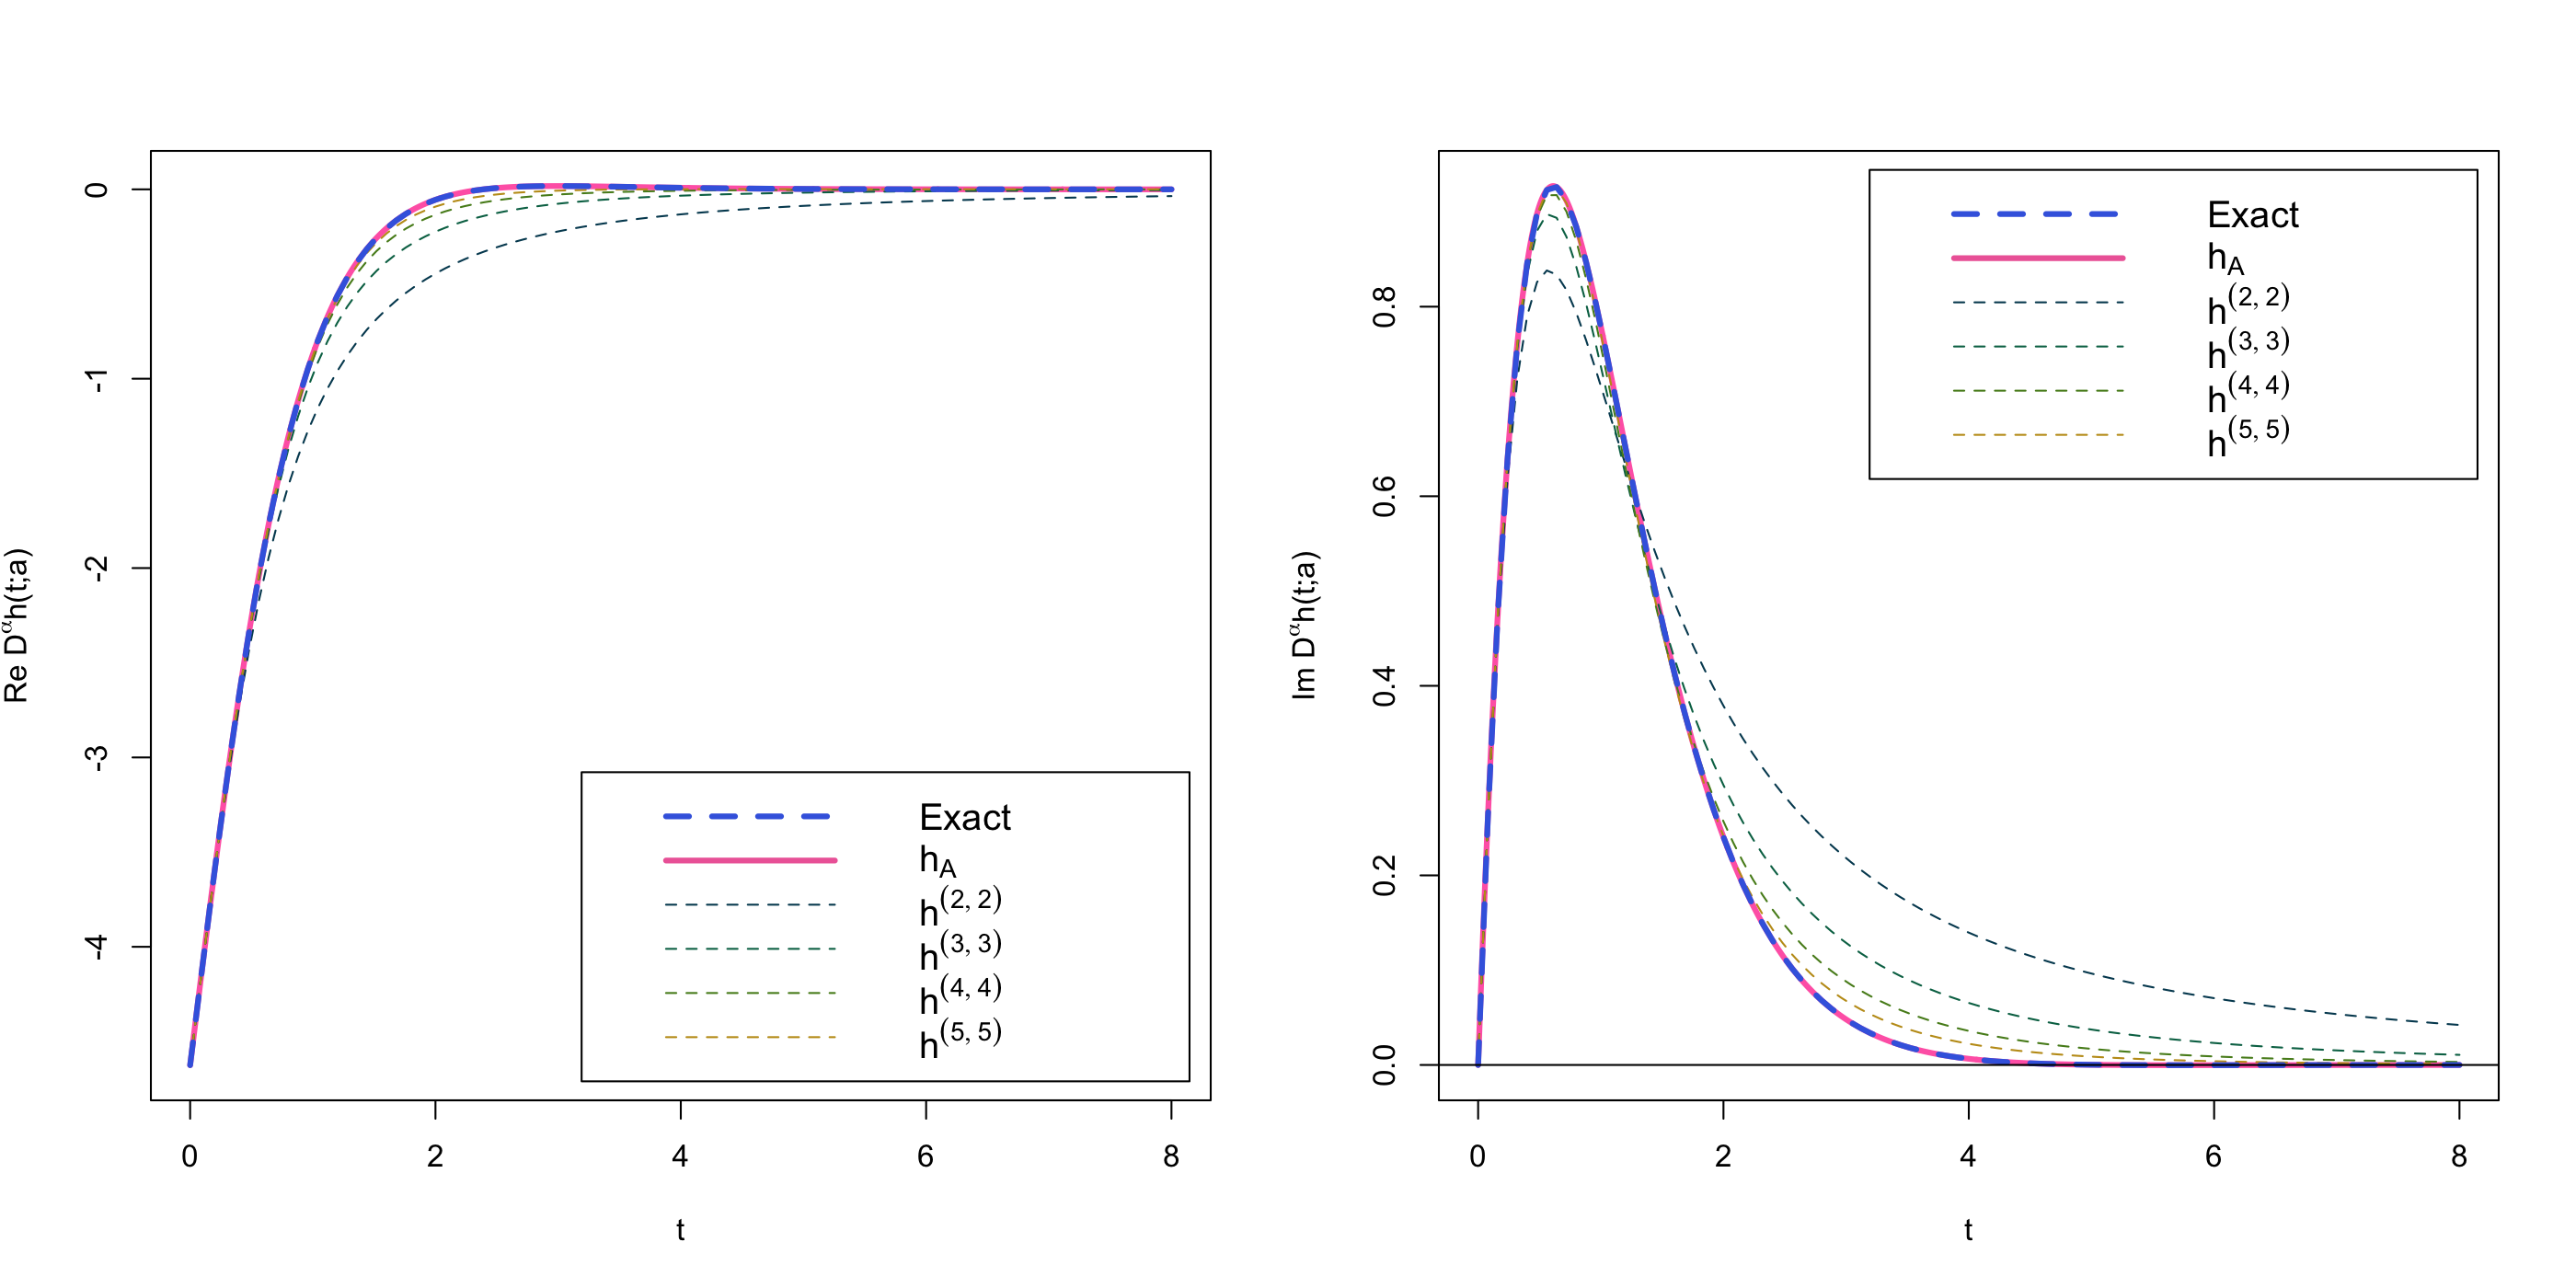

In [13]:
par(mfrow=c(1,2))

plot(x.adams.1k,Re(dh.adams.1k),type="l",col="hotpink",lty=1,lwd=3,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Re(d.h.Pade22(params.rHeston)(a,x)),from=0,to=xx,col=my.col[2],lty=2,lwd=1,add=T)
curve(Re(d.h.Pade33(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=2,lwd=1,add=T)
curve(Re(d.h.Pade44(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=2,lwd=1,add=T)
curve(Re(d.h.Pade55(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=2,lwd=1,add=T)
curve(Re(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col="royalblue",lty=2,lwd=3,add=T)
legend("bottomright", legend = legend.text,  cex = 1.2, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)

plot(x.adams.1k,Im(dh.adams.1k),type="l",col="hotpink",lty=1,lwd=3,
     ylab=expression(paste("Im ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Im(d.h.Pade22(params.rHeston)(a,x)),from=0,to=xx,col=my.col[2],lty=2,lwd=1,add=T)
curve(Im(d.h.Pade33(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=2,lwd=1,add=T)
curve(Im(d.h.Pade44(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=2,lwd=1,add=T)
curve(Im(d.h.Pade55(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=2,lwd=1,add=T)
curve(Im(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col="royalblue",lty=2,lwd=3,add=T)
abline(h=0)
legend("topright", legend = legend.text,  cex = 1.2, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)


par(mfrow=c(1,1))

### Fig. 4.3: Plot Padé errors

In [14]:
legend.text <- c(
    expression(h^{(list(2,2))}),
    expression(h^{(list(3,3))}),
    expression(h^{(list(4,4))}),
    expression(h^{(list(5,5))}))

In [15]:
legend.ty <- c(1,1,1,1)
legend.col <- c(my.col[2:5])#,"pink","orange")
legend.lw <- c(2,2,2,2)#,1,1)

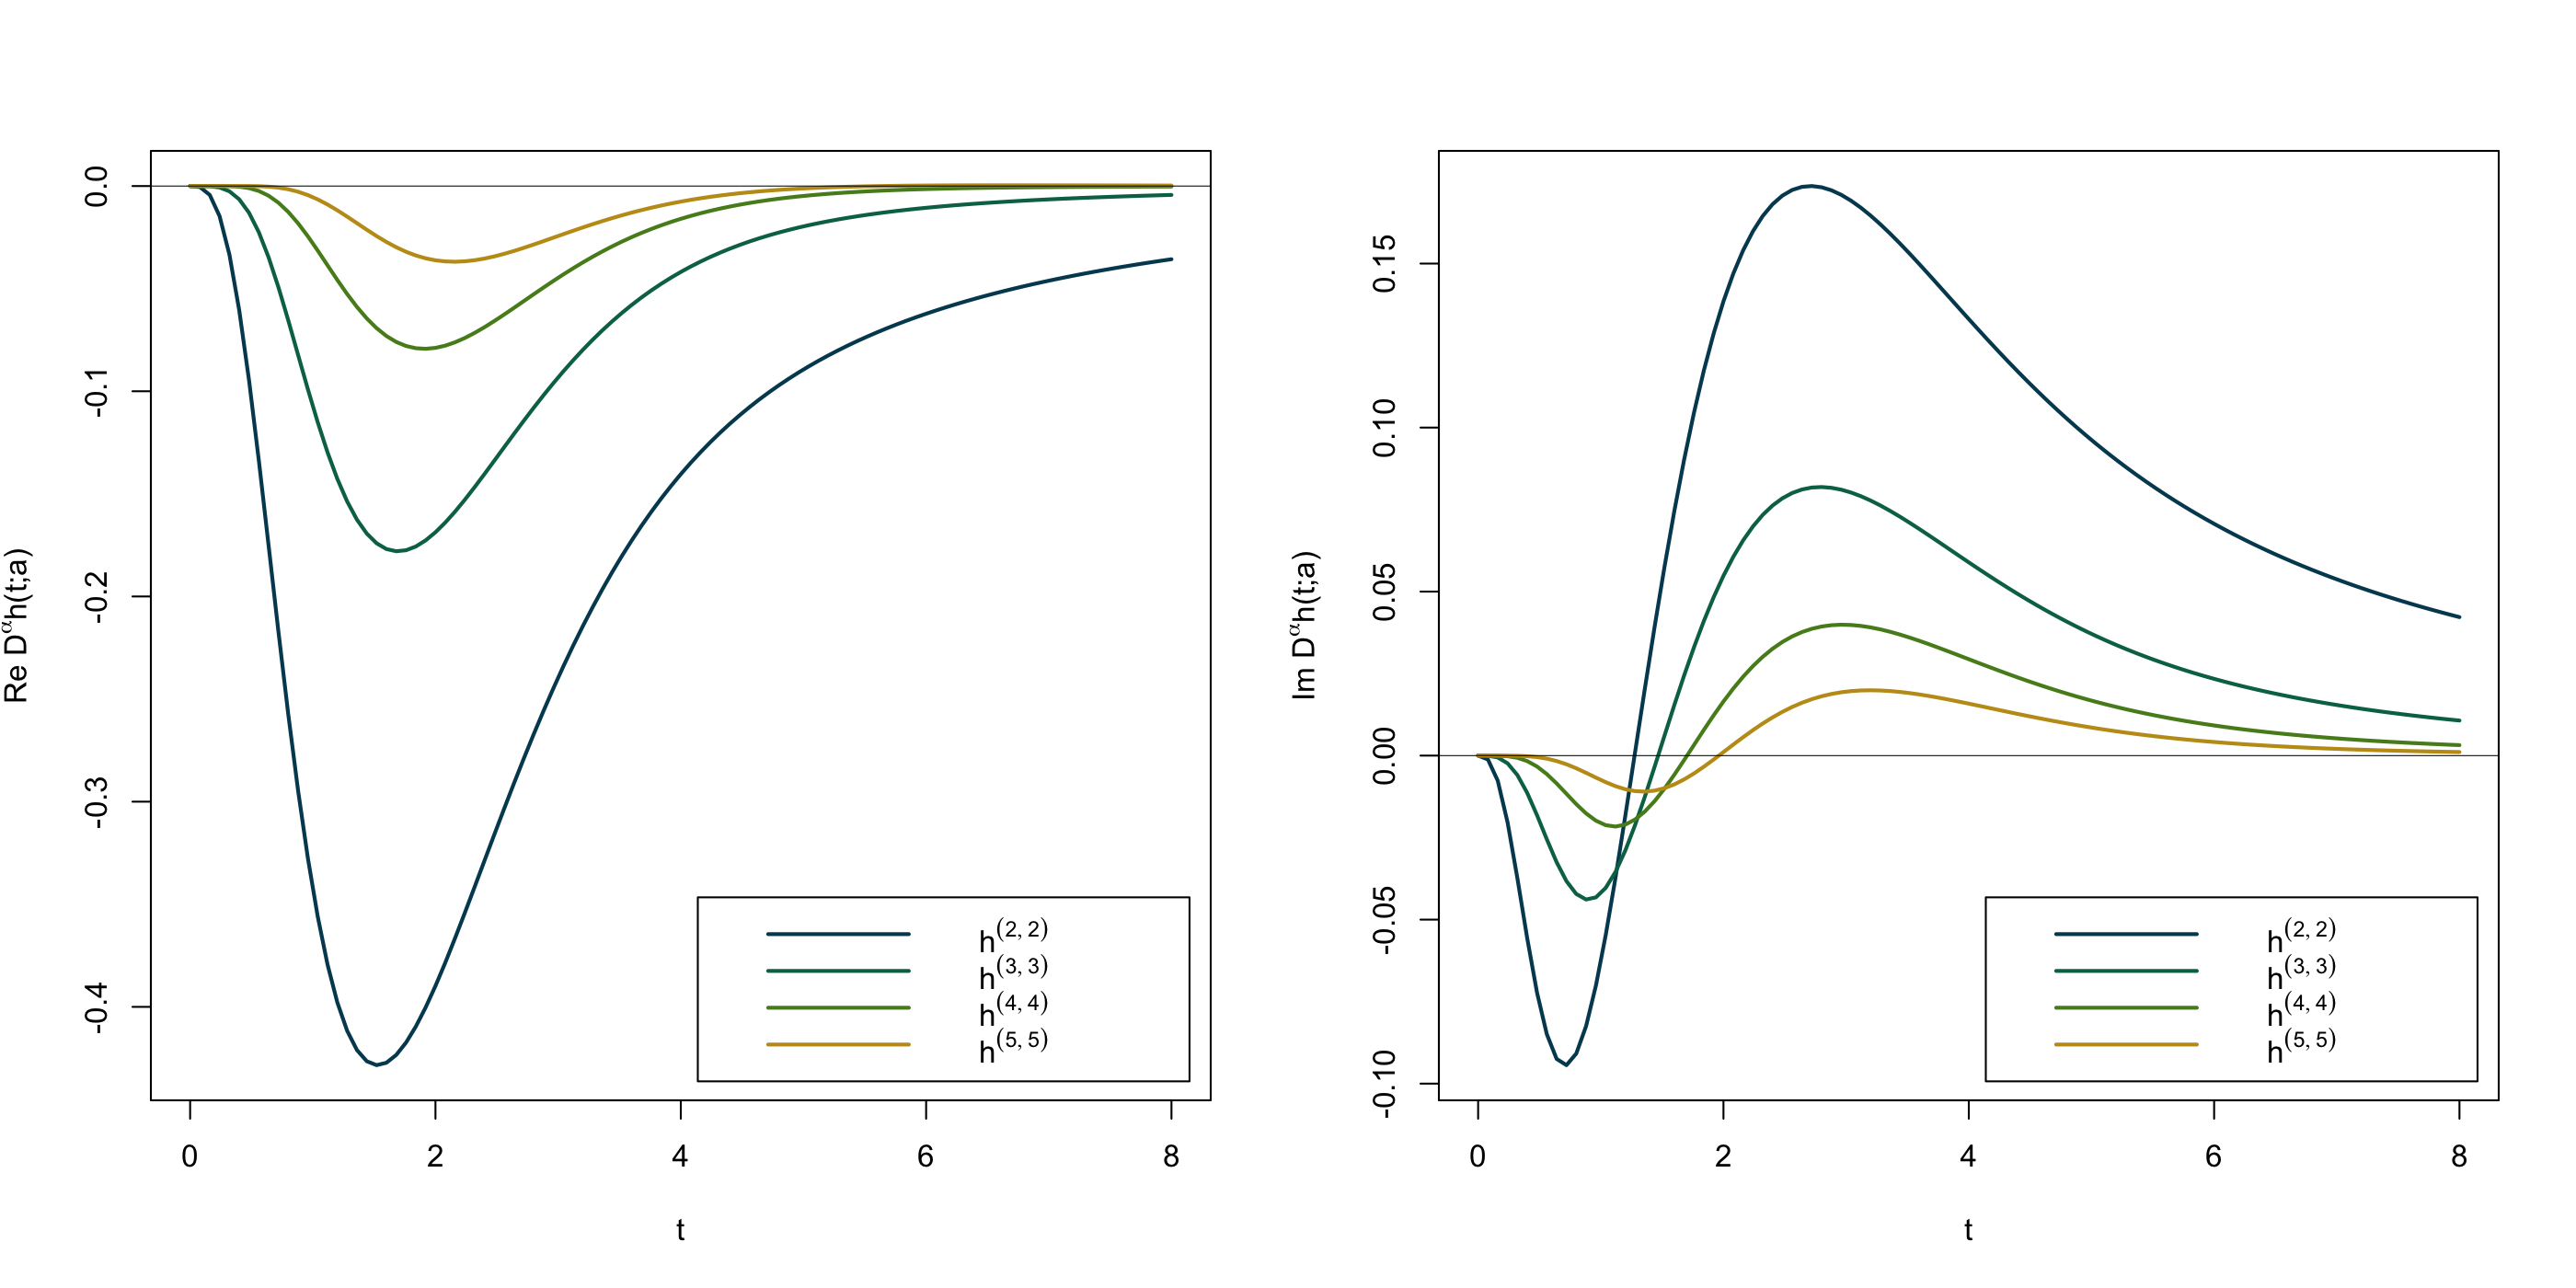

In [16]:
par(mfrow=c(1,2))

curve(Re(d.h.Pade22(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[2],lty=1,lwd=2,
     ylab=expression(paste("Re ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Re(d.h.Pade33(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=1,lwd=2,add=T)
curve(Re(d.h.Pade44(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=1,lwd=2,add=T)
curve(Re(d.h.Pade55(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=1,lwd=2,add=T)
abline(h=0,lwd=.5)
legend("bottomright", legend = legend.text,  cex = 1, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)

curve(Im(d.h.Pade22(params.rHeston)(a,x))-Im(dhHeston(params.rHeston)(a,x)),from=0,to=xx,
      col=my.col[2],lty=1,lwd=2,
     ylab=expression(paste("Im ",D^alpha,"h(t;a)",sep="")),xlab="t")
curve(Im(d.h.Pade33(params.rHeston)(a,x))-Im(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[3],lty=1,lwd=2,add=T)
curve(Im(d.h.Pade44(params.rHeston)(a,x))-Im(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[4],lty=1,lwd=2,add=T)
curve(Im(d.h.Pade55(params.rHeston)(a,x))-Im(dhHeston(params.rHeston)(a,x)),from=0,to=xx,col=my.col[5],lty=1,lwd=2,add=T)
abline(h=0,lwd=.5)
legend("bottomright", legend = legend.text,  cex = 1, 
       col=legend.col, lwd = legend.lw, lty=legend.ty,inset=0.02)

par(mfrow=c(1,1))

### Fig. 4.4: Find and plot the biggest errors

#### Real part

In [17]:
f.Re <- function(dh.approx)function(x){Re(dh.approx(params.rHeston)(a,x))-Re(dhHeston(params.rHeston)(a,x))}

In [18]:
err.Re <- function(h.approx){optimize( f.Re(h.approx),c(1,3))$objective}

In [19]:
(err.Re2 <- c(
err.Re(d.h.Pade22),err.Re(d.h.Pade33),err.Re(d.h.Pade44),err.Re(d.h.Pade55)
    ))

[1] -0.42841644 -0.17798711 -0.07931784 -0.03687978

#### Impaginary part

In [20]:
f.Im <- function(dh.approx)function(x){-Im(dh.approx(params.rHeston)(a,x))+Im(dhHeston(params.rHeston)(a,x))}

In [21]:
err.Im <- function(h.approx){optimize( f.Im(h.approx),c(1,6))$objective}

In [22]:
(err.Im2 <- c(
err.Im(d.h.Pade22),err.Im(d.h.Pade33),err.Im(d.h.Pade44),err.Im(d.h.Pade55)
    ))

[1] -0.17363993 -0.08187871 -0.03990493 -0.01991589

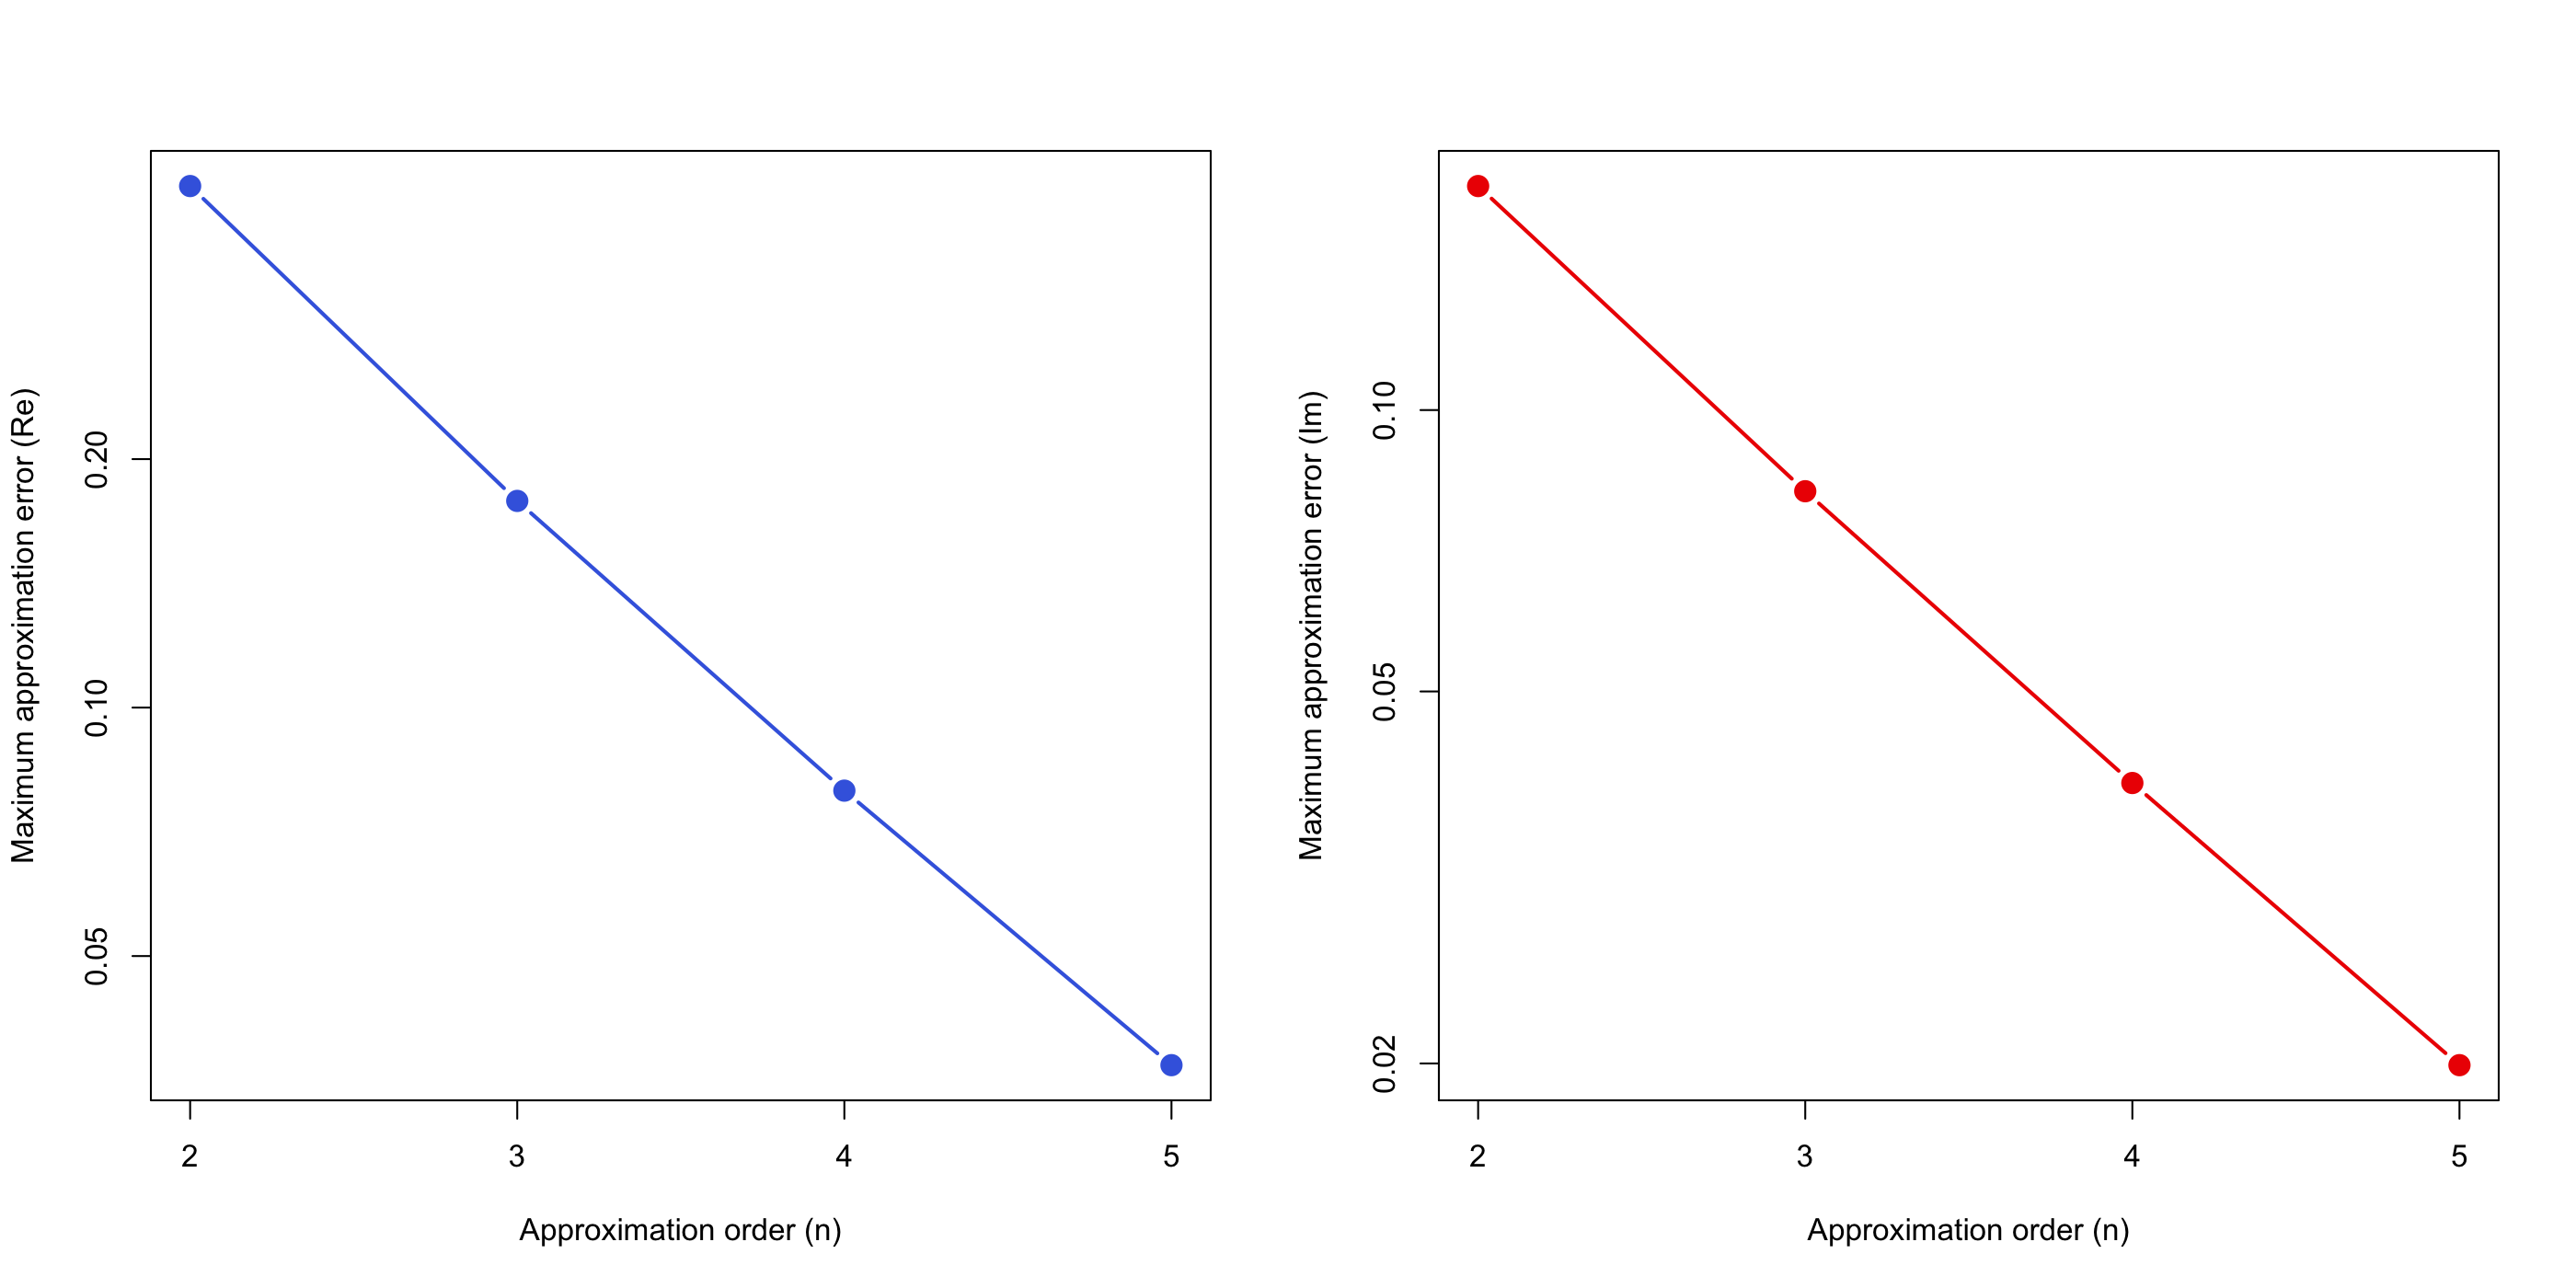

In [23]:
par(mfrow=c(1,2))

plot(2:5,-err.Re2,pch=20,col="royalblue",type="b",lwd=2,cex=2,log="y",
     xaxt="n", 
    xlab="Approximation order (n)",ylab="Maximum approximation error (Re)")
axis(1, at = 2:5)

plot(2:5,-err.Im2,pch=20,col="red2",type="b",lwd=2,cex=2,log="y",
     xaxt="n", xlab="Approximation order (n)",ylab="Maximum approximation error (Im)")
axis(1, at = 2:5)

par(mfrow=c(1,1))